In [10]:
#imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import os

In [11]:
#fetch data
ticker = 'FIL.TO'
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2020-1-1', end='2023-12-31') #data from 2020 to 2023

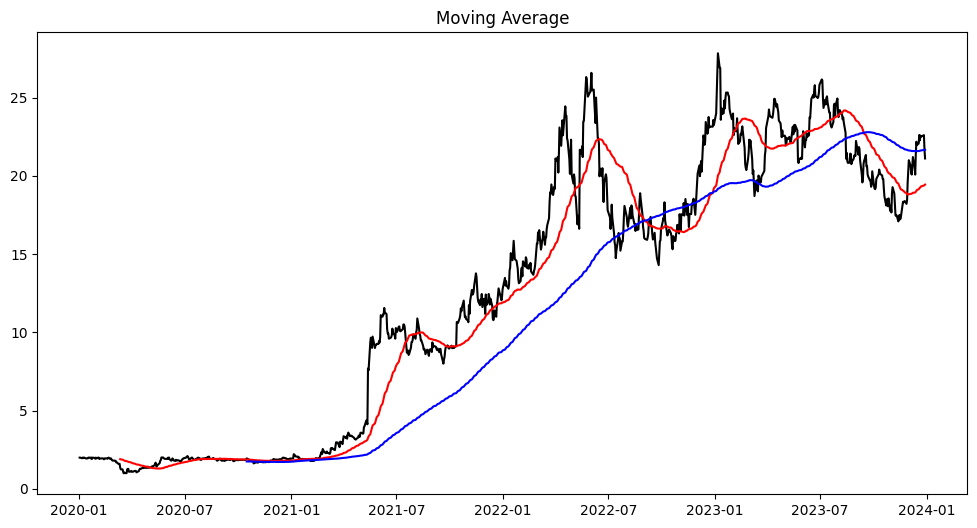

In [12]:
#Moving Average
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

#plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA50'], label='MA50', color='red')
plt.plot(df['MA200'], label='MA200', color='blue')
plt.title('Moving Average')
plt.show()

Text(0.5, 1.0, 'RSI')

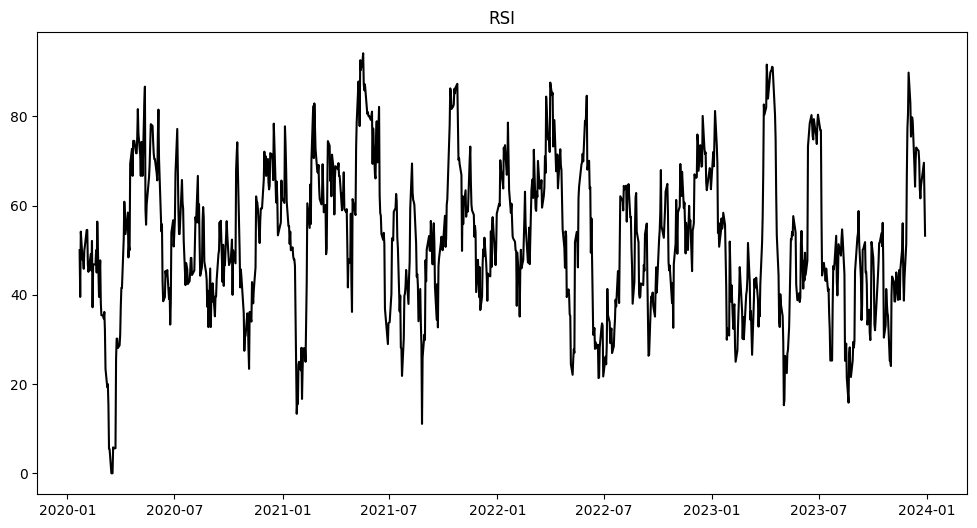

In [13]:
#RSI
change = df['Close'].diff()
gain = change.mask(change<0, 0)
loss = -change.mask(change>0, -0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

#plot
plt.figure(figsize=(12,6))
plt.plot(rsi, label='RSI', color='black')
plt.title('RSI')